***Download the dataset***

In [1]:
#!curl https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz --output cifar-10-python.tar.gz
#!tar -xzvf cifar-10-python.tar.gz
#!rm cifar-10-python.tar.gz

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.vision import *
from fastai.metrics import error_rate

In [4]:
torch.cuda.is_available()

True

In [5]:
torch.cuda.set_device(3)
bs=128 #how many images to train at the same time

In [6]:
path=untar_data(URLs.PETS); path

PosixPath('/home/deep/.fastai/data/oxford-iiit-pet')

In [7]:
#help(untar_data)

In [8]:
path.ls()

[PosixPath('/home/deep/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/home/deep/.fastai/data/oxford-iiit-pet/annotations')]

In [9]:
path_anno=path/'annotations'
path_img=path/'images'

In [10]:
fnames=get_image_files(path_img)
fnames[:5]

[PosixPath('/home/deep/.fastai/data/oxford-iiit-pet/images/Siamese_87.jpg'),
 PosixPath('/home/deep/.fastai/data/oxford-iiit-pet/images/chihuahua_126.jpg'),
 PosixPath('/home/deep/.fastai/data/oxford-iiit-pet/images/german_shorthaired_97.jpg'),
 PosixPath('/home/deep/.fastai/data/oxford-iiit-pet/images/Bombay_157.jpg'),
 PosixPath('/home/deep/.fastai/data/oxford-iiit-pet/images/Bengal_12.jpg')]

In [11]:
np.random.seed(2)
pat=r'/([^/]+)_\d+.jpg$' #sacar as labels--->regular expressions

In [ ]:
data=ImageDataBunch.from_name_re(path_img,fnames,pat,ds_tfms=get_transforms(),size=224,bs=bs, num_workers=8)
data.normalize(imagenet_stats)

In [ ]:
data.show_batch(rows=3,figsize=(7,6))

In [ ]:
print(data.classes)
len(data.classes),data.c

***Training resnet34***

In [ ]:
learn = cnn_learner(data, models.resnet34,metrics=error_rate) #download the pretrained weights

In [ ]:
learn.model;

In [ ]:
learn.fit_one_cycle(4) #how many times it goes through the dataset

In [ ]:
learn.save('stage-1')

***Results***

In [ ]:
interp=ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.plot_top_losses(9,figsize=(15,11))

In [ ]:
doc(interp.plot_top_losses) #show in docs, (prediction,actual,loss,probability)

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12),dpi=60)

In [ ]:
interp.most_confused(min_val=2) #(shoud be the prediction,what was the prediction,how many times)

***Unfreezing, fine-tunning, and learning rates (Make our model better)***

In [ ]:
learn.unfreeze() #unfreeze to train our model some more

In [ ]:
learn.fit_one_cycle(1)

In [ ]:
learn.load('stage-1');

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [ ]:
learn.unfreeze()  #allows to train the all net
learn.fit_one_cycle(2,max_lr=slice(1e-6,1e-4)) #train the very first layers at 1e-6 and the very last layers at 1e-4 (learning rate)

***Trainning resnet50***

In [12]:
data=ImageDataBunch.from_name_re(path_img,fnames,pat,ds_tfms=get_transforms(),size=224,bs=bs//2, num_workers=8)

In [13]:
learn=cnn_learner(data, models.resnet50,metrics=error_rate)

In [14]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


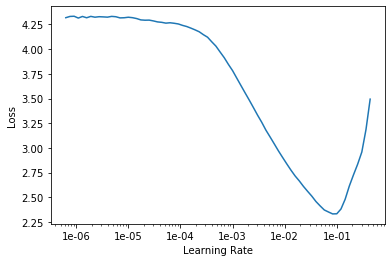

In [15]:
learn.recorder.plot()

In [16]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,1.087583,0.297427,0.085927,00:21
1,0.486010,0.290543,0.092693,00:21
2,0.324699,0.273923,0.090663,00:21
3,0.240925,0.215830,0.064276,00:20
4,0.192195,0.206934,0.067659,00:21
5,0.149276,0.182394,0.058863,00:21
6,0.106698,0.177297,0.059540,00:21
7,0.095159,0.173365,0.056834,00:21


In [19]:
learn.save('stage-1-50')

In [20]:
learn.unfreeze()

In [22]:
learn.fit_one_cycle(3,max_lr=slice(1e-6,1e-4)) #fine tunning

epoch,train_loss,valid_loss,error_rate,time
0,0.094562,0.169440,0.053451,00:27
1,0.086363,0.166000,0.056834,00:27
2,0.073210,0.166391,0.054804,00:27


In [25]:
learn.load('stage-1-50');

In [26]:
interp=ClassificationInterpretation.from_learner(learn)

In [28]:
interp.most_confused(min_val=2) #(shoud be the prediction,what was the prediction,how many times)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 6),
 ('Bengal', 'Egyptian_Mau', 5),
 ('Ragdoll', 'Birman', 4),
 ('Ragdoll', 'Siamese', 3),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 3),
 ('Birman', 'Ragdoll', 2),
 ('Egyptian_Mau', 'Bengal', 2),
 ('Maine_Coon', 'Persian', 2),
 ('Sphynx', 'chihuahua', 2),
 ('american_bulldog', 'american_pit_bull_terrier', 2),
 ('american_bulldog', 'staffordshire_bull_terrier', 2),
 ('basset_hound', 'beagle', 2),
 ('beagle', 'basset_hound', 2),
 ('boxer', 'american_bulldog', 2),
 ('boxer', 'american_pit_bull_terrier', 2),
 ('english_cocker_spaniel', 'english_setter', 2),
 ('keeshond', 'leonberger', 2)]

***Other Data formats***

In [36]:
path=untar_data(URLs.MNIST_SAMPLE);path

PosixPath('/home/deep/.fastai/data/mnist_sample')

In [37]:
(path/'train').ls()

[PosixPath('/home/deep/.fastai/data/mnist_sample/train/3'),
 PosixPath('/home/deep/.fastai/data/mnist_sample/train/7')]

In [30]:
tfms=get_transforms(do_flip=False)
data=ImageDataBunch.from_folder(path,ds_tfms=tfms,size=26)

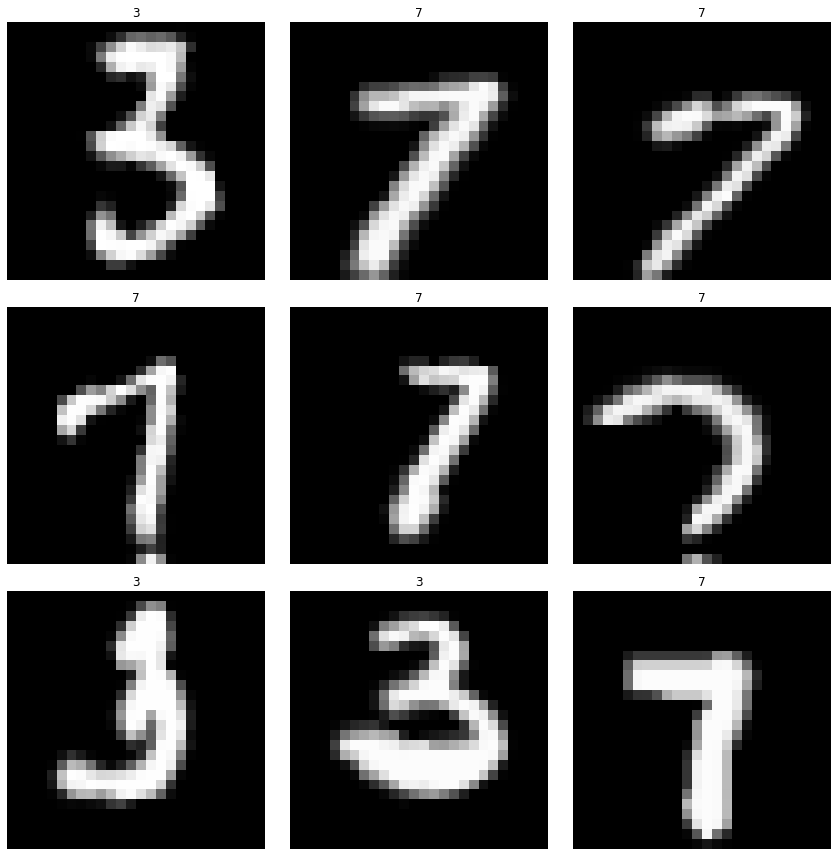

In [31]:
data.show_batch(rows=3,figze=(5,5))

In [34]:
learn=cnn_learner(data,models.resnet18,metrics=accuracy) #shows the accuracy on the table
learn.fit(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.162139,0.077159,0.970559,00:05
1,0.101870,0.044526,0.982336,00:05


In [38]:
#CSV

In [40]:
df=pd.read_csv(path/'labels.csv')
df.head()

,name,label
0,train/3/7463.png,0
1,train/3/21102.png,0
2,train/3/31559.png,0
3,train/3/46882.png,0
4,train/3/26209.png,0


In [41]:
data=ImageDataBunch.from_csv(path,ds_tfms=tfms,size=28)

[0, 1]

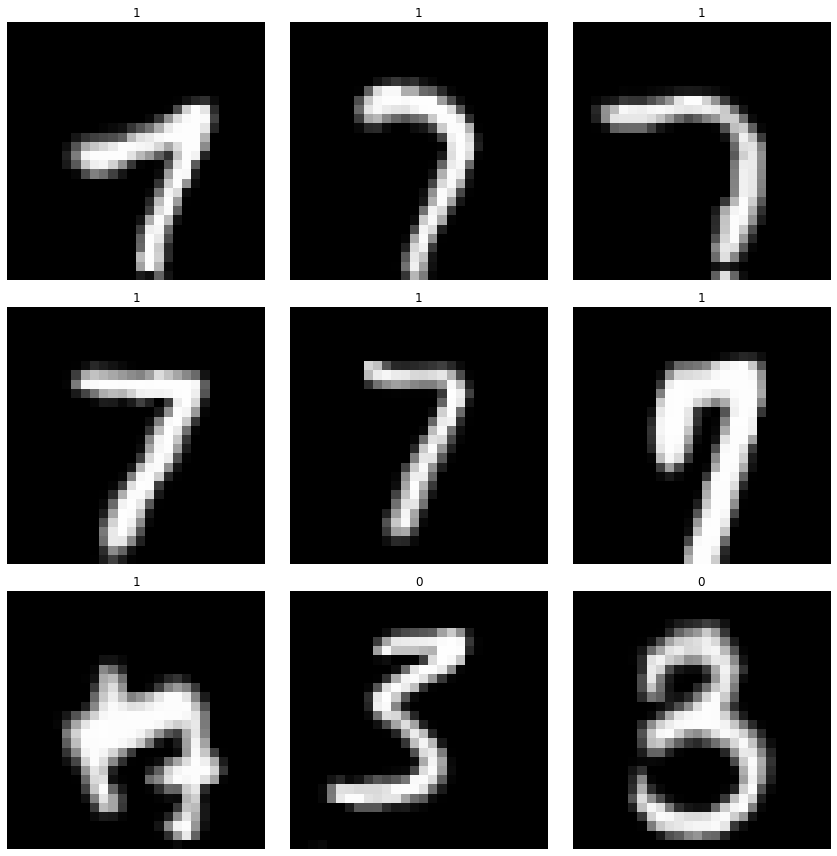

In [43]:
data.show_batch(rows=3,figsizs=(5,5))
data.classes

In [44]:
fn_paths=[path/name for name in df['name']];fn_paths[:2]

[PosixPath('/home/deep/.fastai/data/mnist_sample/train/3/7463.png'),
 PosixPath('/home/deep/.fastai/data/mnist_sample/train/3/21102.png')]

In [49]:
pat = r"/(\d)/\d+\.png$" #regular expressions
data = ImageDataBunch.from_name_re(path, fn_paths, pat=pat, ds_tfms=tfms, size=24)
data.classes

['3', '7']

In [50]:
data = ImageDataBunch.from_name_func(path, fn_paths, ds_tfms=tfms, size=24,
        label_func = lambda x: '3' if '/3/' in str(x) else '7')
data.classes

['3', '7']

In [51]:
labels = [('3' if '/3/' in str(x) else '7') for x in fn_paths]
labels[:5]

['3', '3', '3', '3', '3']

In [52]:
data = ImageDataBunch.from_lists(path, fn_paths, labels=labels, ds_tfms=tfms, size=24)
data.classes

['3', '7']

# Regular expressions VIDEO

1. \d ---> Represents any number
2. \D ---> Represents anything but a number
3. \s ---> Represents any space
4. \w ---> Represents any character
5. \W ---> Represents anything but  a number
6. ? ---> 0 or 1 repetitions
7. \* ---> 0 or more repetitions
8. {n} ---> n repetitions
9. \e ---> Escape
10. \f ---> Form feed
11. \n ---> New line
12. \r ---> Cariage return
13. \r ---> tab

<a href="https://www.youtube.com/watch?v=DRR9fOXkfRE&feature=youtu.be
" target="_blank"><img src="https://www.youtube.com/embed/DRR9fOXkfRE" 
alt="IMAGE ALT TEXT HERE" width="240" height="180" border="10" /></a>